In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
def gen_testdata():
    data = np.load("Burgers.npz")
    t, x, exact = data["t"], data["x"], data["usol"].T

    return t,x,exact

In [20]:
t,x,u =gen_testdata()
u.shape

(100, 256)

<Figure size 576x432 with 0 Axes>

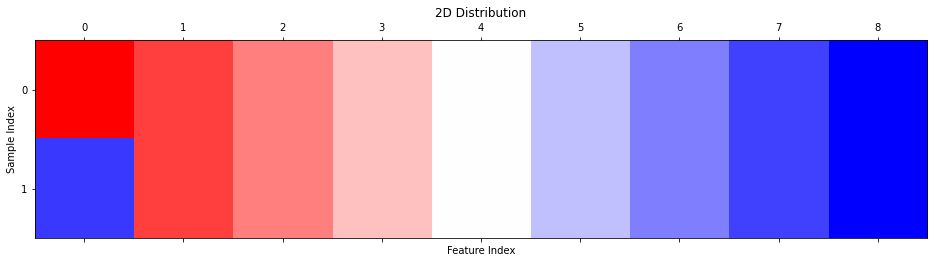

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 给定的数据
data = np.array([[0.1000, 0.0888, 0.0775, 0.0662, 0.0550, 0.0438, 0.0325, 0.0213, 0.0100],
                 [0.02, 0.0888, 0.0775, 0.0662, 0.0550, 0.0438, 0.0325, 0.0213, 0.0100]])

# 生成一个二维的坐标网格
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# 使用contourf绘制等高线图
plt.figure(figsize=(8, 6))

plt.matshow(data, cmap='bwr')

plt.colorbar()
# 添加标题和轴标签
plt.title('2D Distribution')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')

plt.show()


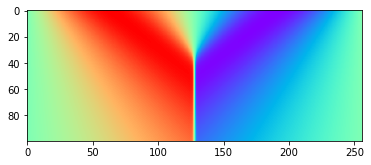

In [22]:
plt.imshow(u,cmap="rainbow")

In [17]:
import torch
import torch.nn as nn
import copy

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(13, 10)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return x

# 创建模型实例
original_model = MyModel()

# 复制模型
copied_model = copy.deepcopy(original_model)

# 让复制后的模型的某个层共享原始模型的同一个层的权重
copied_model.layer1 = original_model.layer1

# 测试权重是否共享
print("Original model layer1 weight:", id(original_model.layer1.weight))
print("Copied model layer1 weight:", id(copied_model.layer1.weight))

# 修改原始模型layer1的权重
with torch.no_grad():
    original_model.layer1.weight += 0.0

# 检查权重是否共享
print("After modification:")
a =original_model.layer1.weight
print("Original model layer1 weight sum:", original_model.layer1.weight.shape)
print("Copied model layer1 weight sum:", copied_model.layer1.weight.sum())


Original model layer1 weight: 139782322111968
Copied model layer1 weight: 139782322111968
After modification:
Original model layer1 weight sum: torch.Size([10, 13])
Copied model layer1 weight sum: tensor(2.9650, grad_fn=<SumBackward0>)


In [22]:
plt.matshow(a,vmin=-0.1,vmax=0.1,cmap="rainbow")

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.